# [Lab Session 4](deconvolution.ipynb)

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

from skimage.restoration import wiener
from scipy.signal import convolve2d as conv
from scipy.stats import multivariate_normal as multi_normal

np.random.seed(0)

Load the image.

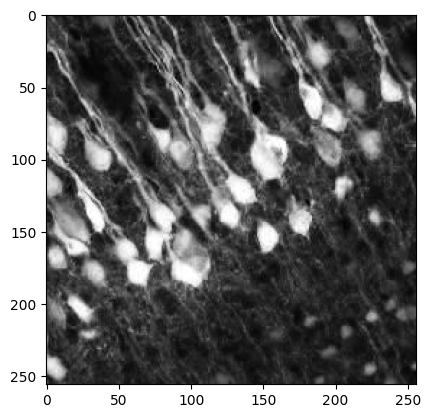

In [138]:
img = plt.imread('data/cells.png')[128:384, 128:384]
plt.imshow(img, 'gray')


**[Task 1.]()** Apply the following PSF to the image and then display it.

In [139]:
psf_size = 5
psf = np.ones((psf_size, psf_size)) / psf_size ** 2

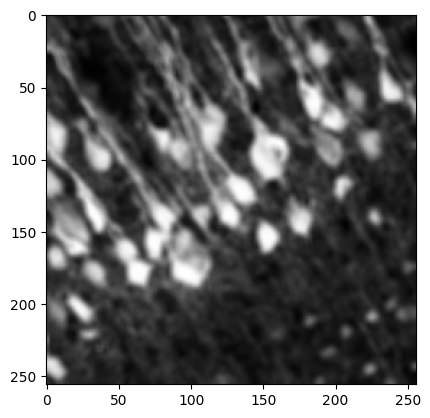

In [140]:
img_conv = conv(img, psf, mode="same", boundary="symm")
plt.imshow(img_conv, 'gray')

**[Task 2.]()** Have a look at the Gaussian PSF which is not uniformly distributed. Apply it to the image. + Apply the second psf to the image

Text(0.5, 1.0, 'Gleichverteilt')

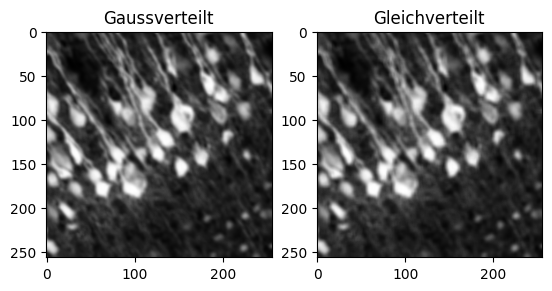

In [141]:
def create_psf(size):
    factor = size * 1.8
    x, y = np.mgrid[0:size:1, 0:size:1]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x
    pos[:, :, 1] = y
    rv = multi_normal([int(size / 2), (int(size / 2))], [[factor * 1., factor * 1.2], [factor * .5, factor * .7]])
    return rv.pdf(pos)

img_conv_1 = conv(img, create_psf(psf_size), mode="same", boundary="symm")


plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img_conv_1, 'gray')
plt.title('Gaussverteilt')
plt.subplot(1, 2, 2)
plt.imshow(img_conv, 'gray')
plt.title('Gleichverteilt')


**[Task 3.]()** Implement a reusable function that performs the Richardson-Lucy deconvolution.

In [142]:
def richardson_lucy_deconvolution(image, psf, iterations=10):
    # Initialize the deconvolved image as an array of the same shape as the image, filled with constant value 0.5
    h = np.full(image.shape, 0.5)

    # Flip the PSF
    psf_flipped = np.flip(psf)

    for _ in range(iterations):
        # Convolve the current deconvolved image with the PSF
        h_conv = conv(h, psf, mode='same')

        # Calculate the ratio of the input image to the convolved image
        ratio = image / h_conv

        # Convolve the ratio with the flipped PSF
        ratio_conv = conv(ratio, psf_flipped, mode='same')

        # Update the deconvolved image
        h = h * ratio_conv
    img_deconv = h.clip(0,1)
    return h

**[Task 4.]()** Apply the Richardson-Lucy deconvolution to the blurred image.

In [143]:
img_deconv = richardson_lucy_deconvolution(img_conv, psf, iterations=10)

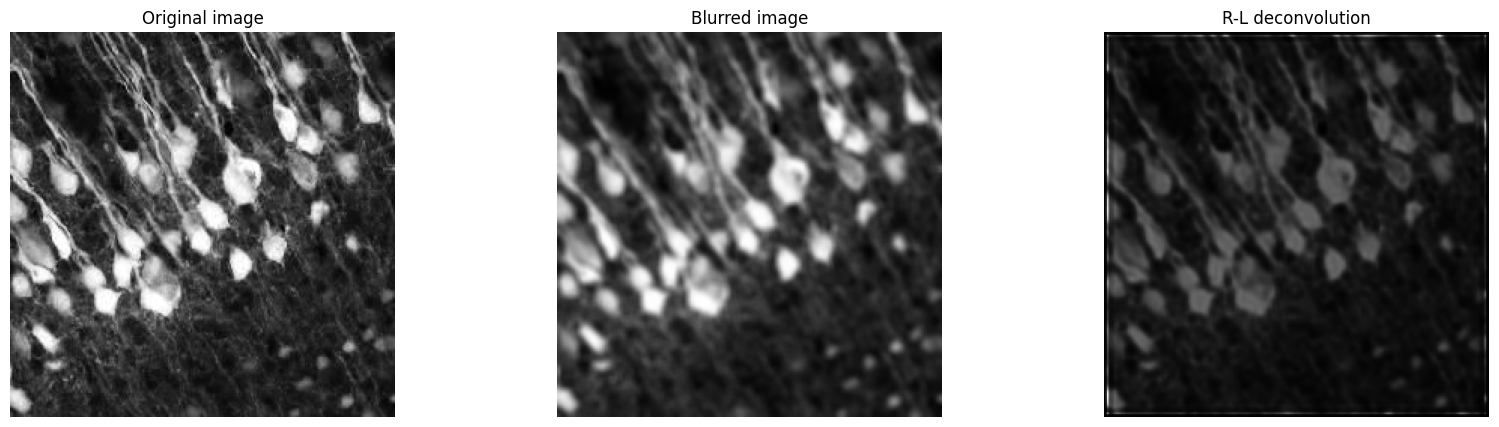

In [144]:
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img, 'gray')
plt.title('Original image')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(img_conv, 'gray')
plt.title('Blurred image')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(img_deconv, 'gray')
plt.title('R-L deconvolution')
plt.show()

**[Task 5.]()** Add noise to the image, use the R-L deconvolution again.

In [145]:
noise = (np.random.normal(loc=0,size=img.shape))
reduce_factor = 5
noise = noise / reduce_factor

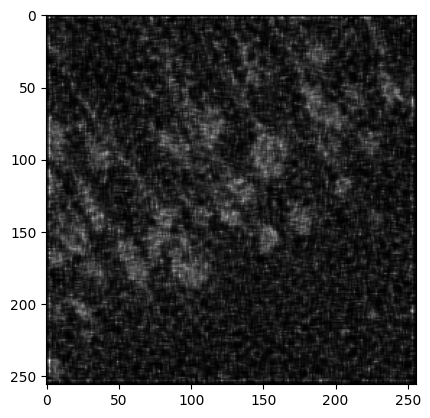

In [146]:
img_conv_2 = img_conv_1 + noise
img_conv_2_clip = np.clip(img_conv_2, 0, 1)

img_deconv_2 = richardson_lucy_deconvolution(img_conv_2_clip, psf, iterations=5)
plt.imshow(img_deconv_2, 'gray')


**[Task 6.]()** Compare your R-L implementation to a wiener deconvolution.

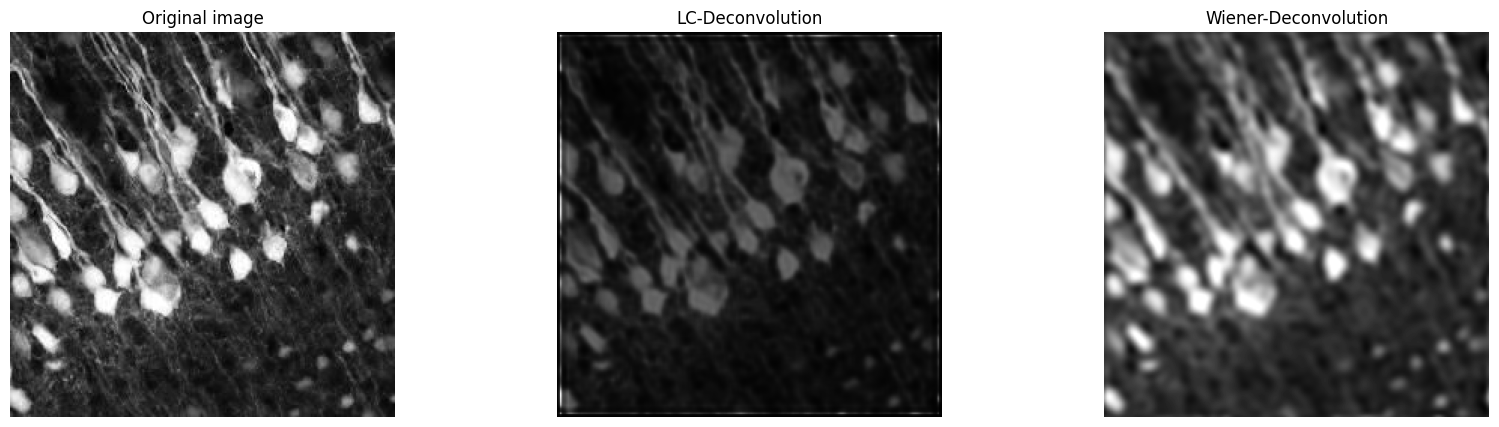

In [147]:
wiener_deconv = wiener(img_conv, psf, balance=2, clip=True)

plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img, 'gray')
plt.title('Original image')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(img_deconv, 'gray')
plt.title('LC-Deconvolution')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(wiener_deconv, 'gray')
plt.title('Wiener-Deconvolution')
plt.show()

**[Task 7.]()** Repeat Tasks 4–6 using a smaller value for the size of the PSF.

In [ ]:
#psf oben durch kleineren Wert getauscht oben 

**[Task 8.]()** Use a wrong PSF to restore the image